In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [3]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

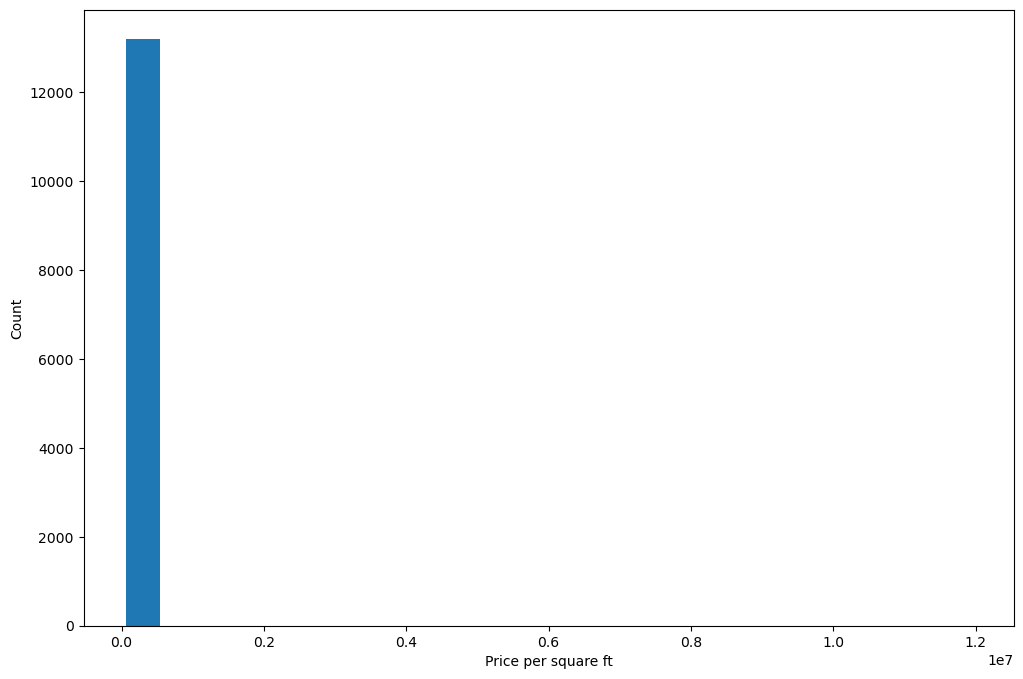

In [4]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

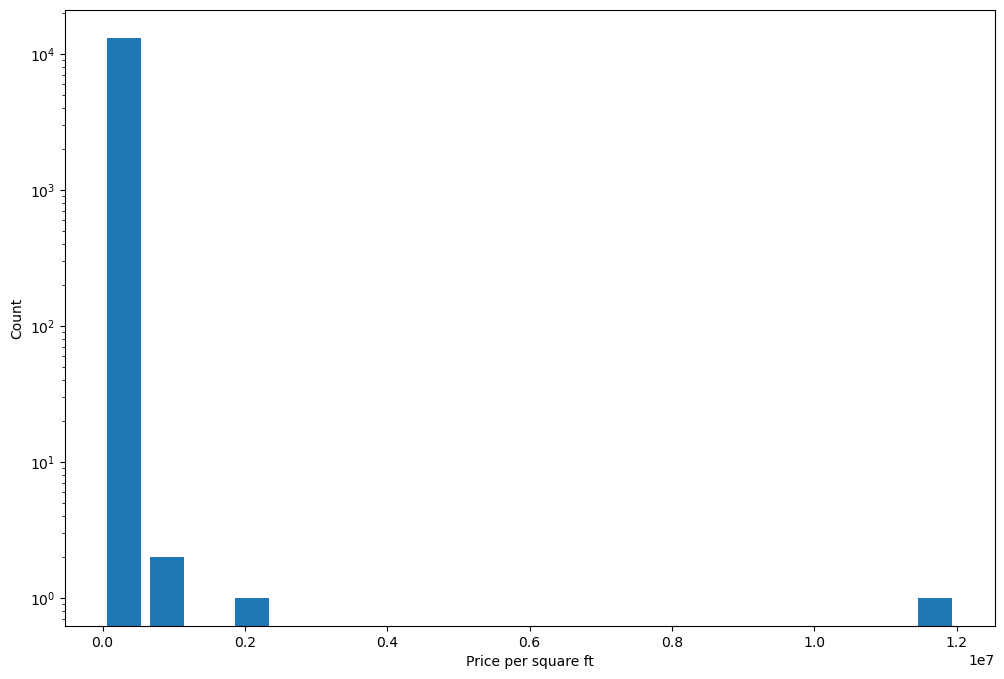

In [5]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [6]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [7]:
outliers = df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
7575,other,1 BHK,425.0,1.0,750.0,1,176470
9436,Indira Nagar,4 Bedroom,2400.0,5.0,1250.0,4,52083
8307,Bannerghatta Road,5 BHK,2500.0,4.0,1400.0,5,56000
8300,Kengeri,1 BHK,1200.0,1.0,14.0,1,1166
7012,other,1 BHK,650.0,1.0,500.0,1,76923
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
5343,other,9 BHK,42000.0,8.0,175.0,9,416


In [8]:
df2 = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2.shape

(13172, 7)

In [9]:
df.shape

(13200, 7)

In [10]:
df.shape[0] - df2.shape[0]

28

In [11]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589429, -9900.429065502549)

In [12]:
df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
12393,Electronic City Phase II,1 BHK,1200.0,1.0,295.0,1,24583
4609,other,4 Bedroom,1800.0,5.0,500.0,4,27777
9229,1st Phase JP Nagar,4 Bedroom,1200.0,4.0,300.0,4,25000
11919,other,3 Bedroom,1524.0,4.0,400.0,3,26246
9853,Indira Nagar,5 Bedroom,2400.0,5.0,700.0,5,29166
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
9907,other,8 Bedroom,600.0,4.0,175.0,8,29166
4555,Judicial Layout,6 Bedroom,1200.0,6.0,300.0,6,25000
12948,other,10 Bedroom,7150.0,13.0,3600.0,10,50349
9711,Rajaji Nagar,2 Bedroom,1056.0,1.0,250.0,2,23674


In [13]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

In [14]:
df2.shape[0]-df3.shape[0]

125

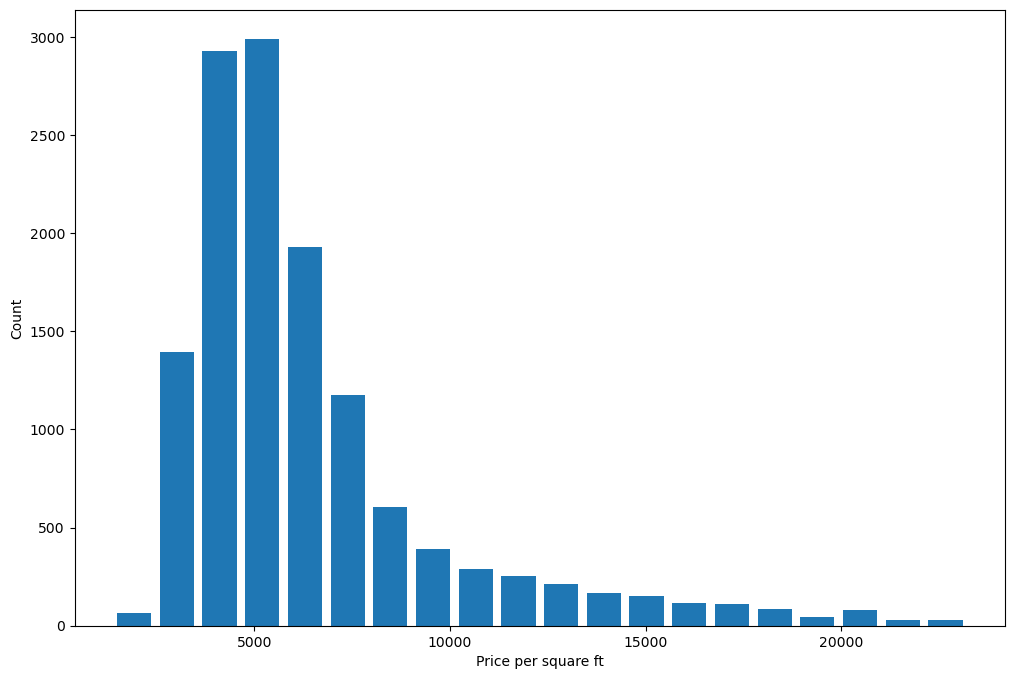

In [15]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

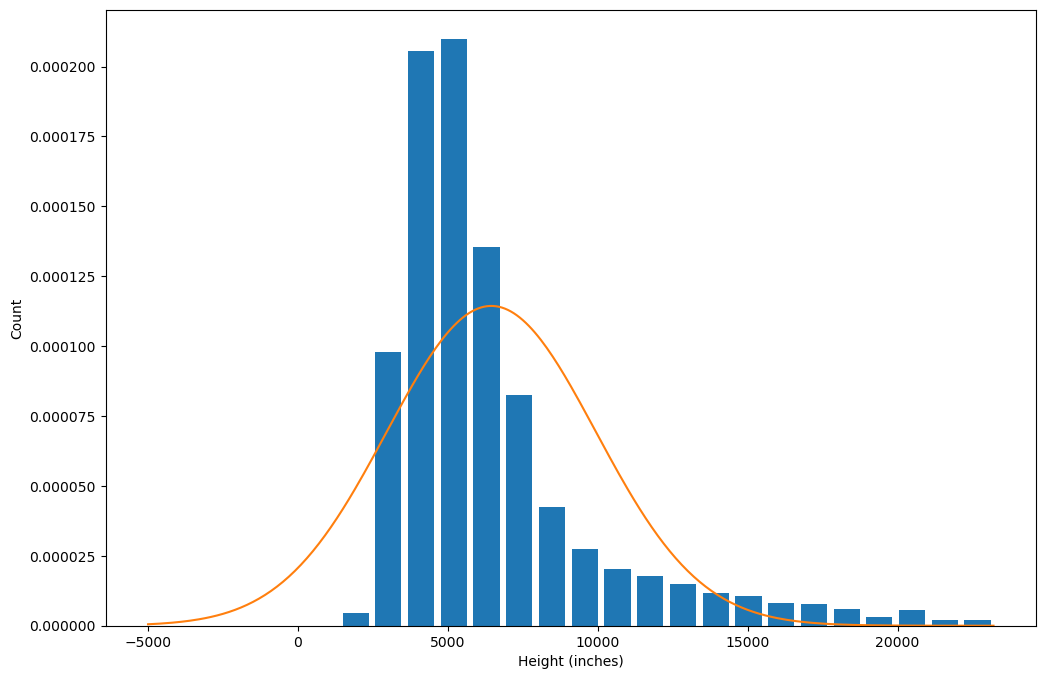

In [16]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

In [17]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

C:\Users\User\AppData\Local\Temp\ipykernel_1524\722868599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
5577,Anekal,2 Bedroom,1200.0,1.0,36.0,2,3000,-0.884722
7170,Rachenahalli,2 BHK,1050.0,2.0,55.5,2,5285,-0.332926
6574,Sarjapur Road,3 BHK,1489.0,2.0,82.0,3,5507,-0.279316
7894,other,11 BHK,6000.0,12.0,150.0,11,2500,-1.005466
5773,KR Puram,2 BHK,1000.0,2.0,44.5,2,4450,-0.534567
7532,Kasavanhalli,2 BHK,1495.0,2.0,83.0,2,5551,-0.268691
7889,Kasavanhalli,2 BHK,1375.0,2.0,78.0,2,5672,-0.239471
5429,2nd Stage Nagarbhavi,3 Bedroom,600.0,4.0,100.0,3,16666,2.415430
496,Lingadheeranahalli,3 BHK,1511.0,3.0,95.0,3,6287,-0.090957
12159,other,2 BHK,1053.0,2.0,44.0,2,4178,-0.600251


In [18]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [19]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9360,HAL 2nd Stage,4 Bedroom,2280.0,4.0,615.0,4,26973,4.904430
9808,Uttarahalli,6 Bedroom,1200.0,6.0,330.0,6,27500,5.031693
2632,other,4 Bedroom,2400.0,4.0,700.0,4,29166,5.434010
6959,Raja Rajeshwari Nagar,4 Bedroom,1350.0,4.0,340.0,4,25185,4.472652
9711,Rajaji Nagar,2 Bedroom,1056.0,1.0,250.0,2,23674,4.107767


In [20]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)

In [21]:
df2.shape[0] - df4.shape[0]

125